In [7]:
import numpy as np
import pandas as pd
import cmocean as cm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt

In [8]:
plt.rcParams['font.weight'] = 'bold'

In [9]:
%matplotlib inline

In [10]:
def meanError(x, y):
    """
    x = observed data
    y = modeladed data
    """
    from numpy import nanmean
    
    return print(nanmean(100*abs(y-x)/x))

In [11]:
def rotaciona_corrente(zonal, meridional, phi):
    phi = np.deg2rad(60)
    ul = zonal * np.cos(phi) + meridional * np.sin(phi)
    vl = -zonal * np.sin(phi) + meridional * np.cos(phi)
    return ul, vl

In [12]:
cd '/home/gus/Documentos/mestrado/dados-mestrado/dados-mercator'

/home/gus/Documentos/mestrado/dados-mestrado/dados-mercator


In [13]:
!ls

coordenadas_mercator.csv	   mercator_validacao.nc
mercator_dado_validacao.nc	   MercatorZonal1.csv
MercatorMeridional1.csv		   mercator_zonal_2011a2019.csv
mercator_meridional_2011a2019.csv  mercator_zonal_2016a2017.csv
mercator_meridional_2016a2017.csv  MercatorZonal2.csv
MercatorMeridional2.csv		   mercator_zonal_ajustado.csv
mercator_meridional_ajustado.csv


In [14]:
dfv = pd.read_csv('mercator_meridional_ajustado.csv', delimiter=';')
dfu = pd.read_csv('mercator_zonal_ajustado.csv', delimiter=';')

### configurando as profundidades e o tempo do mercator

In [15]:
depthStr = np.array(dfu.columns)
depthMercator = depthStr[0:19]

In [16]:
timeMercator = np.array(dfu.time[:].copy())

In [17]:
timeMercator = [dt.strptime(ii,'%Y-%m-%d %H:%M:%S') for ii in timeMercator]

### calculo das componentes paralelas e perpendiculares do mercator

In [18]:
u = np.array(dfu.iloc[:,0:4].copy())
v = np.array(dfv.iloc[:,0:4].copy())

In [19]:
ul, vl = rotaciona_corrente(u, v, 60)

In [20]:
dful = pd.DataFrame(ul)
dfvl = pd.DataFrame(vl)

In [21]:
dful.columns = depthMercator[:4]
dfvl.columns = depthMercator[:4]

In [22]:
del u, v, ul, vl

### checando os tempos do hycom

In [23]:
timeMercator[0], timeMercator[-1]

(datetime.datetime(2016, 12, 1, 12, 0), datetime.datetime(2017, 9, 18, 12, 0))

### Carregando os dados da boia

In [24]:
path = '/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos/'

ulboia24 = pd.read_csv(path+'ulboia_media_24horas.csv', delimiter=';')
vlboia24 = pd.read_csv(path+'vlboia_media_24horas.csv', delimiter=';')

In [25]:
ulboia24.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,5.204576,7.400391,7.928349,8.060759,8.134675,8.218879,8.224969,8.433774,8.453570,8.183562,7.533898,6.664877,5.321504,2.896538,0.141963,-3.530473,-7.707808,-13.017357,-18.377462,-17.362222
std,6.621351,6.154670,6.130773,6.429238,6.370752,5.707756,5.130239,5.573257,5.457184,5.344635,5.142732,5.038868,5.059992,5.443230,6.426400,7.581662,9.338265,11.379941,14.038655,18.731607
min,-14.419799,-10.553661,-7.867502,-20.268093,-31.544958,-19.475536,0.122918,-2.153432,0.092185,-0.490756,-0.573654,-2.886434,-6.266732,-11.736833,-22.144494,-28.234686,-37.414912,-44.331197,-65.985507,-70.390719
25%,1.876951,3.783534,4.146757,4.420248,4.428909,4.427596,4.325620,4.427385,4.547132,4.273779,3.946522,3.188754,2.386776,-0.047792,-3.104758,-7.453778,-12.993117,-20.043512,-26.848065,-30.024459
50%,4.570703,6.976740,7.497099,7.432647,7.769681,7.800669,7.511425,7.545970,7.619114,7.302965,6.810875,5.802137,4.856601,2.442237,-0.307992,-3.548609,-7.610694,-11.989002,-17.673396,-16.348618
75%,6.998958,9.841780,10.741916,10.599831,11.050216,10.808793,10.532734,10.709856,10.641984,9.986940,9.613864,9.072261,7.534615,5.635100,4.126486,0.969219,-1.927582,-5.434730,-9.863006,-5.234251
max,49.256420,38.186650,38.707021,38.126555,36.191370,33.579951,28.377845,33.397222,32.611393,32.018578,31.292867,29.422570,28.894134,25.414783,22.345636,25.960098,24.697939,27.054767,33.773105,47.973181


In [26]:
len(ulboia24), len(vlboia24)

(292, 292)

In [27]:
depthBoia = np.arange(5.5, 55, 2.5)

In [28]:
list(enumerate(depthBoia))

[(0, 5.5),
 (1, 8.0),
 (2, 10.5),
 (3, 13.0),
 (4, 15.5),
 (5, 18.0),
 (6, 20.5),
 (7, 23.0),
 (8, 25.5),
 (9, 28.0),
 (10, 30.5),
 (11, 33.0),
 (12, 35.5),
 (13, 38.0),
 (14, 40.5),
 (15, 43.0),
 (16, 45.5),
 (17, 48.0),
 (18, 50.5),
 (19, 53.0)]

In [29]:
tempoDias = mdates.date2num(timeMercator)

In [30]:
myfmt = mdates.DateFormatter('%Y-%b')

### plot das series temporais

Text(0.5, 0, 'Time (days)')

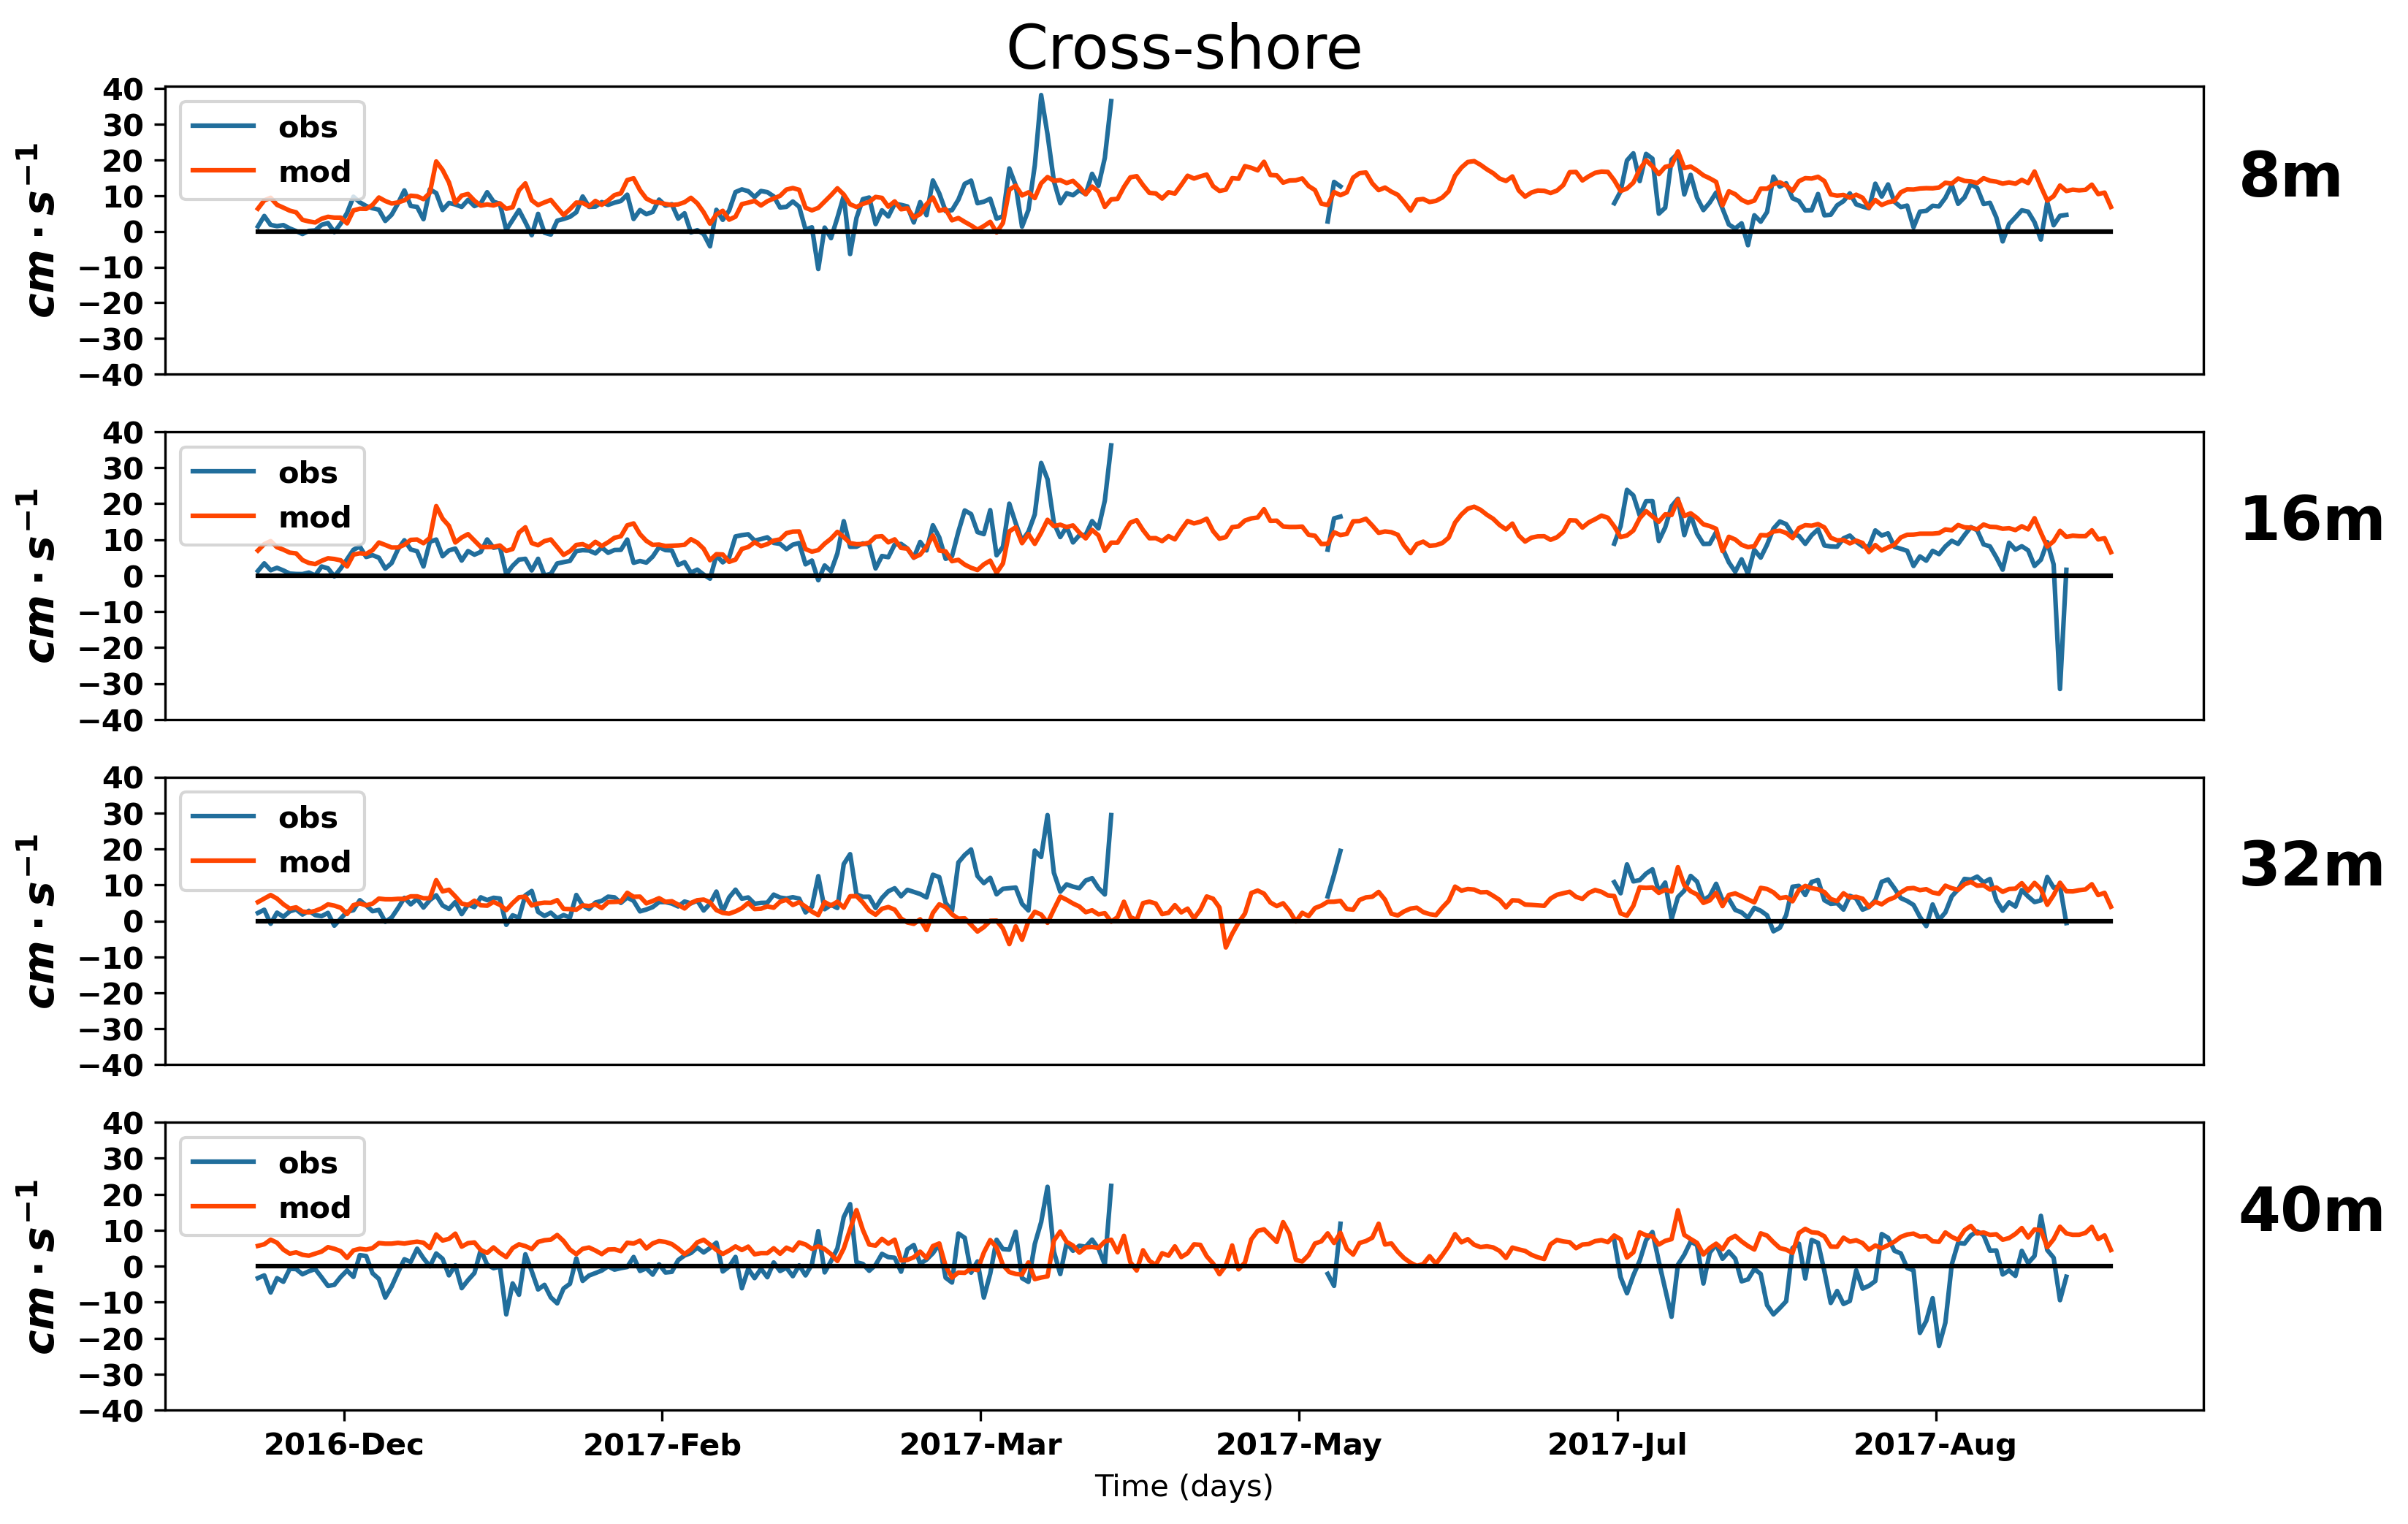

In [31]:
# perpendicular a costa

linhaZero = np.zeros(len(dful))

fig, ax = plt.subplots(nrows=4, figsize=(12,8), dpi=300)

# 8m
ax[0].plot(tempoDias,ulboia24.iloc[:,1] ,c='#216e9c',label='obs')
ax[0].plot(tempoDias,dful.iloc[:,0],c='orangered',label='mod')
ax[0].plot(tempoDias,linhaZero,c='black')

# 16m
ax[1].plot(tempoDias,ulboia24.iloc[:,4],c='#216e9c',label='obs')
ax[1].plot(tempoDias,dful.iloc[:,1],c='orangered',label='mod')
ax[1].plot(tempoDias,linhaZero,c='black')

#32m
ax[2].plot(tempoDias,ulboia24.iloc[:,11], c='#216e9c',label='obs')
ax[2].plot(tempoDias,dful.iloc[:,2], c='orangered',label='mod')
ax[2].plot(tempoDias,linhaZero,c='black')

#40 m
ax[3].plot(tempoDias,ulboia24.iloc[:,14], c='#216e9c',label='obs')
ax[3].plot(tempoDias,dful.iloc[:,3], c='orangered',label='mod')
ax[3].plot(tempoDias,linhaZero,c='black')


ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')

# profundidades
ax[0].text(max(tempoDias)+20, 10, '8m', fontsize=20)
ax[1].text(max(tempoDias)+20, 10, '16m', fontsize=20)
ax[2].text(max(tempoDias)+20, 10, '32m', fontsize=20)
ax[3].text(max(tempoDias)+20, 10, '40m', fontsize=20)


ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])


ax[0].set_yticks(range(-40,50,10))
ax[1].set_yticks(range(-40,50,10))
ax[2].set_yticks(range(-40,50,10))
ax[3].set_yticks(range(-40,50,10))


ax[3].xaxis.set_major_formatter(myfmt)

#titulo 
ax[0].set_title('Cross-shore', fontsize=20)

#ylabel
ax[0].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)
ax[1].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)
ax[2].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)
ax[3].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)

ax[3].set_xlabel('Time (days)')

Text(0.5, 0, 'Time (days)')

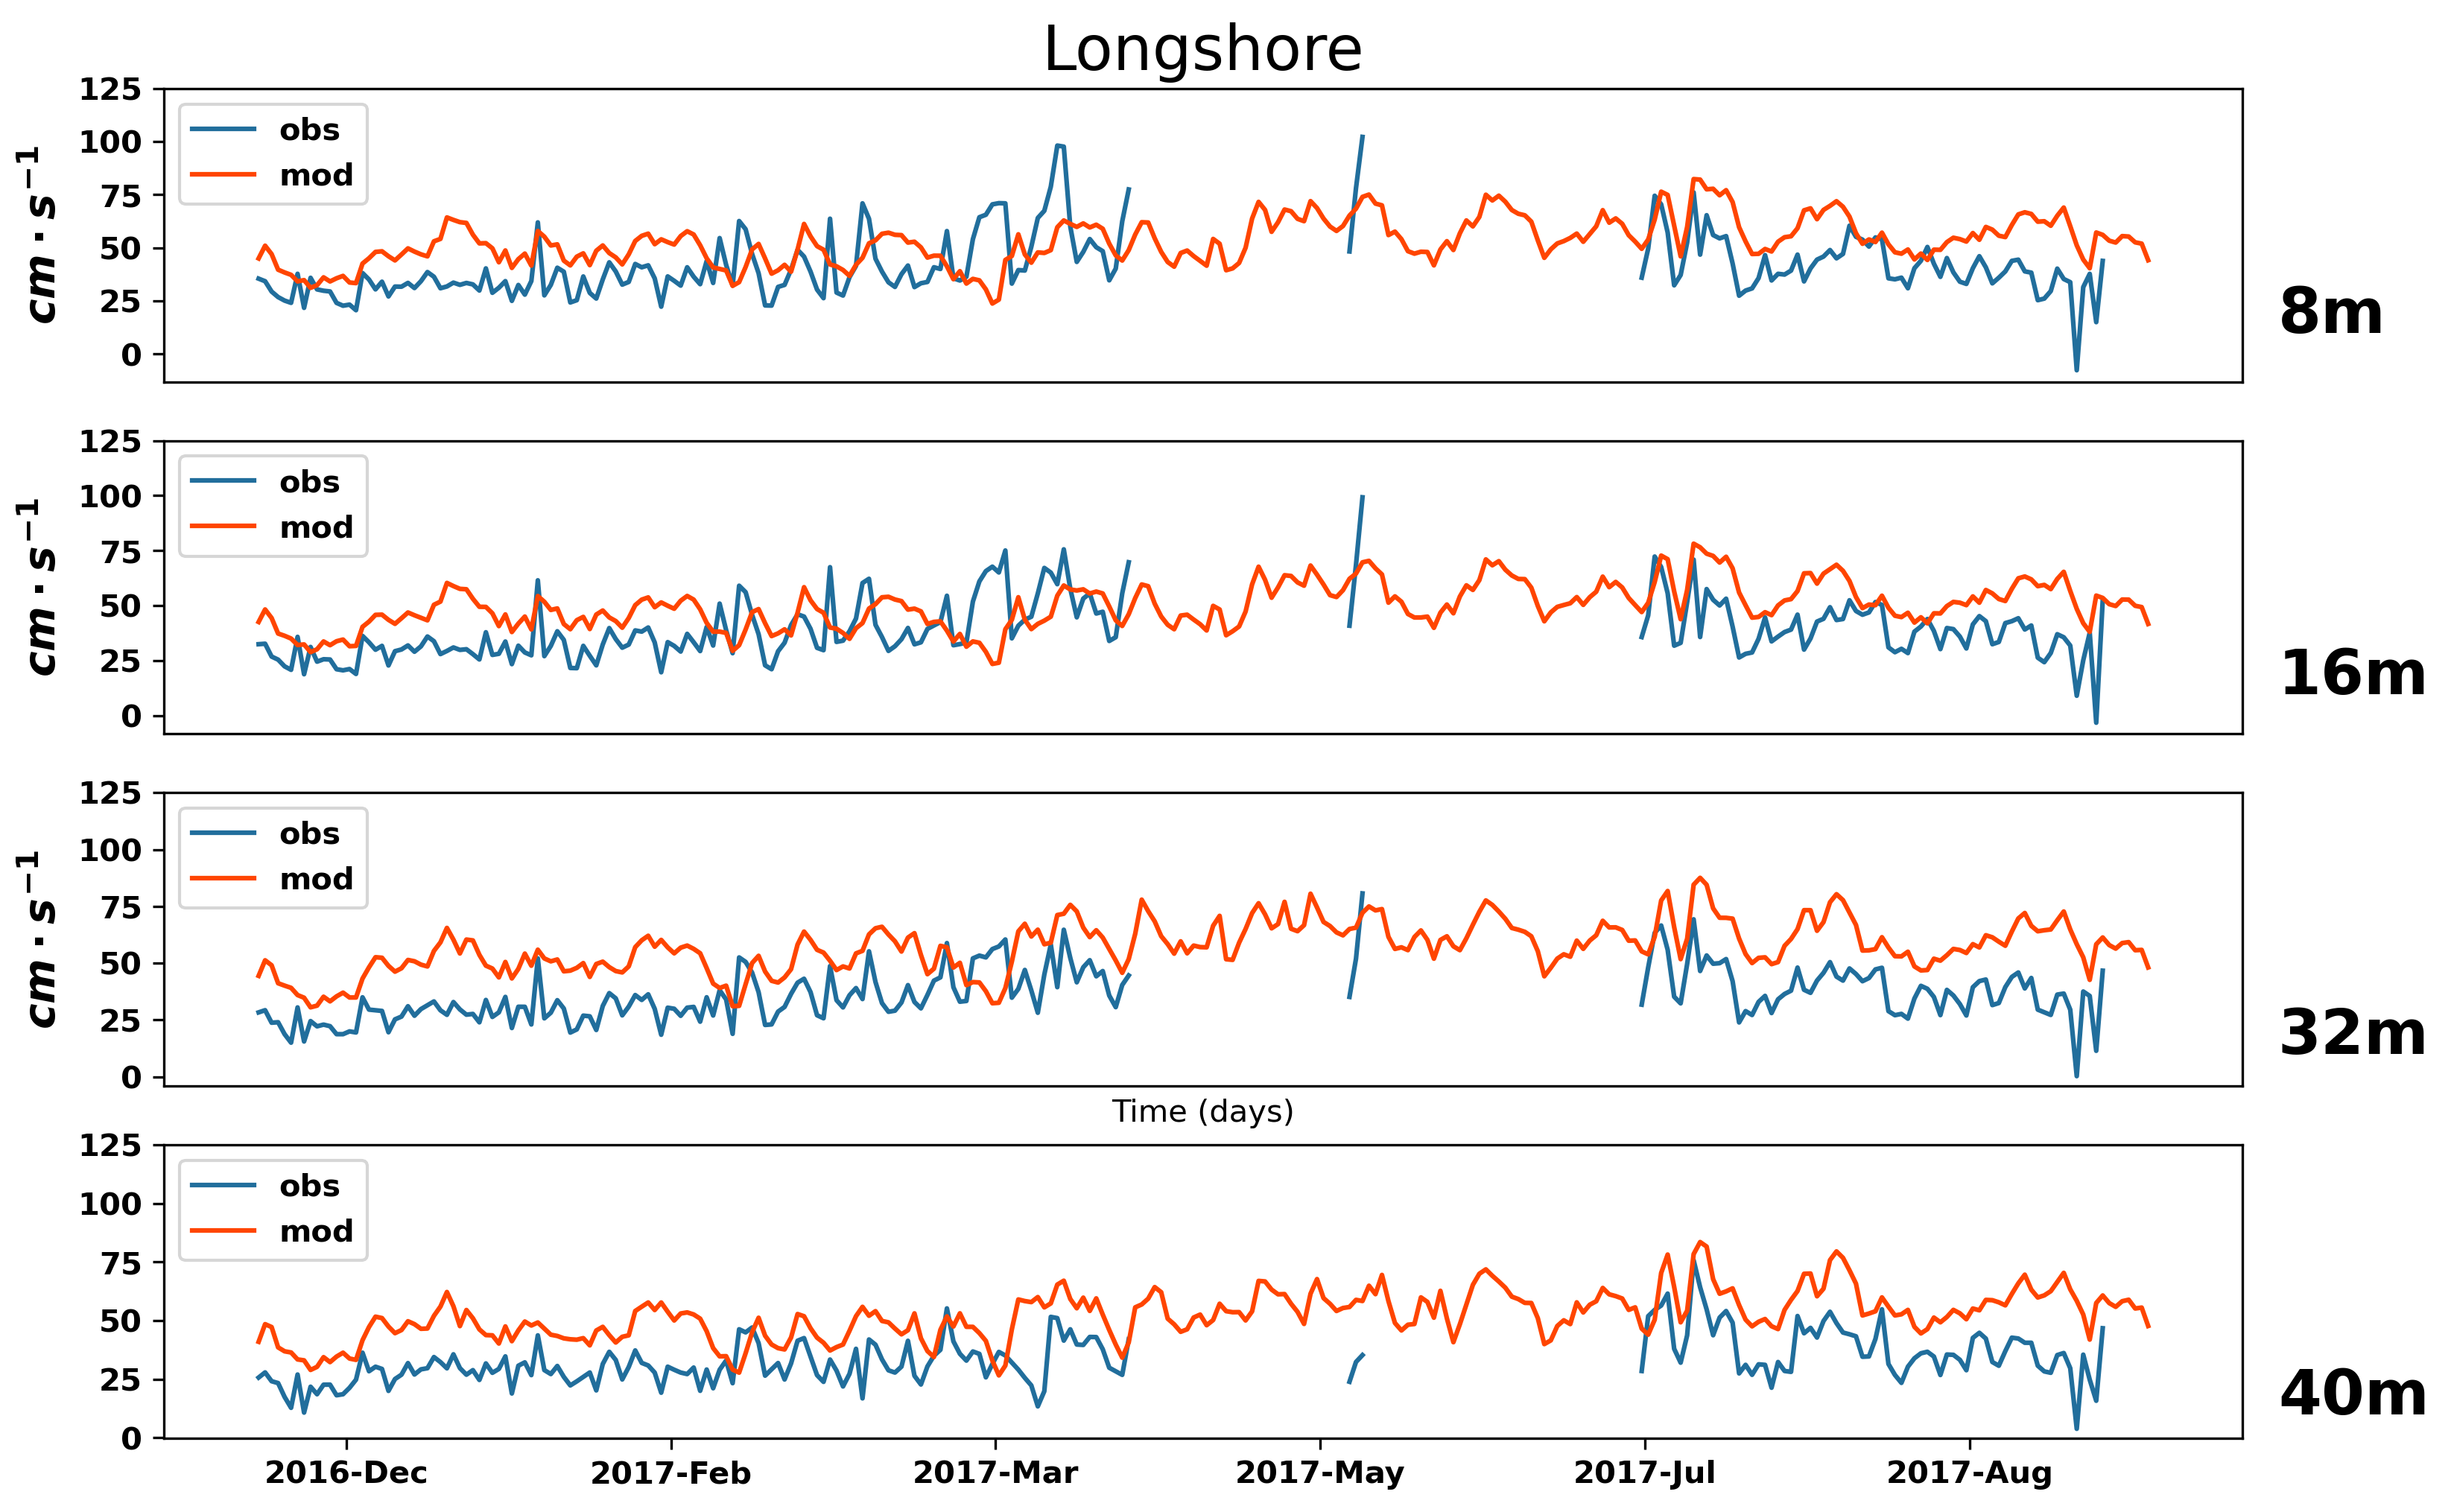

In [32]:
# paralela a costa

fig, ax = plt.subplots(nrows=4, figsize=(12,8), dpi=300)

# 8m
ax[0].plot(tempoDias,vlboia24.iloc[:,1], c='#216e9c',label='obs')
ax[0].plot(tempoDias,dfvl.iloc[:,0], c='orangered',label='mod')

# 16m
ax[1].plot(tempoDias,vlboia24.iloc[:,4], c='#216e9c',label='obs')
ax[1].plot(tempoDias,dfvl.iloc[:,1], c='orangered',label='mod')

#32 m
ax[2].plot(tempoDias,vlboia24.iloc[:, 10], c='#216e9c',label='obs')
ax[2].plot(tempoDias,dfvl.iloc[:, 2], c='orangered',label='mod')

#40 m
ax[3].plot(tempoDias,vlboia24.iloc[:, 14], c='#216e9c',label='obs')
ax[3].plot(tempoDias,dfvl.iloc[:, 3], c='orangered',label='mod')


ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')


# profundidades
ax[0].text(max(tempoDias)+20, 10, '8m', fontsize=20)
ax[1].text(max(tempoDias)+20, 10, '16m', fontsize=20)
ax[2].text(max(tempoDias)+20, 10, '32m', fontsize=20)
ax[3].text(max(tempoDias)+20, 10, '40m', fontsize=20)


ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])


ax[0].set_yticks(range(0,150,25))
ax[1].set_yticks(range(0,150,25))
ax[2].set_yticks(range(0,150,25))
ax[3].set_yticks(range(0,150,25))



ax[3].xaxis.set_major_formatter(myfmt)


#titulo 
ax[0].set_title('Longshore', fontsize=20)

ax[0].set_ylabel(r'$cm\cdot s^{-1}$',fontsize=14)
ax[1].set_ylabel(r'$cm\cdot s^{-1}$',fontsize=14)
ax[2].set_ylabel(r'$cm\cdot s^{-1}$',fontsize=14)
ax[2].set_ylabel(r'$cm\cdot s^{-1}$',fontsize=14)


ax[2].set_xlabel('Time (days)')

### calculo dos parametros estatisticos

In [33]:
import mvalidation

In [34]:
# z= 8, 16 e 32 m
indexMercator = [0, 1, 2, 3]
indexBoia = [1, 4, 10, 14]

# skill

### paralelo

### perpendicular

In [35]:
for ii, jj in zip(indexBoia, indexMercator):
    print(mvalidation.skill(ulboia24.iloc[:,ii], dful.iloc[:,jj]))

0.6169746899437486
0.5453645578364629
0.38252889717462224
0.5663096877215885


In [36]:
for ii, jj in zip(indexBoia, indexMercator):
    print(mvalidation.skill(vlboia24.iloc[:,ii], dfvl.iloc[:,jj]))

0.6267026712518442
0.6238313017737019
0.723493832818612
0.7302249544305042


# RMSE

### paralelo

In [167]:
for ii, jj in zip(indexBoia, indexMercator):
    print(mvalidation.rmse(vlboia24.iloc[:,ii], dfvl.iloc[:,jj]))

18.744485164521112
17.499195957663083
22.446333963133785
19.966655942990275


### perpendicular

In [168]:
for ii, jj in zip(indexBoia, indexMercator):
    print(mvalidation.rmse(ulboia24.iloc[:,ii], dful.iloc[:,jj]))

6.48574183406661
6.514555732122125
6.901333409057648
9.138678560714414


## Correlação

#### perpendicular

In [169]:
for ii, jj in zip(indexBoia, indexMercator):
    print(ulboia24.iloc[:,ii].corr(dful.iloc[:,jj], method = 'pearson'))

0.3516261613261913
0.2947625975699592
-0.20047384723020026
-0.03270178068267851


#### paralela

In [170]:
for ii, jj in zip(indexBoia, indexMercator):
    print(vlboia24.iloc[:,ii].corr(dfvl.iloc[:,jj], method = 'pearson'))

0.26573082657643543
0.2555752939340247
0.44209431903987556
0.5579860227750235


## Erro médio

#### perpendicular

In [39]:
for ii, jj in zip(indexBoia, indexMercator):
    meanError(ulboia24.iloc[:,ii], dful.iloc[:,jj])

103.11941795408057
247.43483717669318
123.1043638777239
-427.0611634153377


In [40]:
for ii, jj in zip(indexBoia, indexMercator):
    meanError(vlboia24.iloc[:,ii], dfvl.iloc[:,jj])

38.81752792953835
34.18408418764733
168.2882390806919
68.16748539333331
